In [1]:
import sys
print(sys.executable)
import numpy
print(numpy.__version__)
import pyarrow

/opt/anaconda3/envs/cs229_project_env/bin/python
1.26.4


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load Dataset: 
data_file = "../usaa_swim_data/swimmers_cleaned.csv"
# Filter data for this event
df_cleaned = pd.read_csv(data_file)

print(df_cleaned.head())

         Name      Event   Time  Age_at_time_of_Swim  \
0  Alex Walsh  50 FR SCY  22.08                   16   
1  Alex Walsh  50 FR SCY  22.18                   18   
2  Alex Walsh  50 FR SCY  22.24                   17   
3  Alex Walsh  50 FR SCY  22.28                   16   
4  Alex Walsh  50 FR SCY  22.35                   16   

                      Time_cut  Time_cut_points   Swim_date Specialty_1  \
0  2018 Summer Nationals (LCM)               19  2018-03-03      200 IM   
1  2021 Summer Nationals (LCM)               19  2020-03-06      200 IM   
2  2019 Summer Nationals (LCM)               19  2019-03-02      200 IM   
3  2018 Summer Nationals (LCM)               19  2017-12-07      200 IM   
4  2018 Winter Nationals (LCM)               18  2017-12-07      200 IM   

  Specialty_2 Stroke_1 Stroke_2 Stroke_3  
0  200 Breast       IM   Breast     Back  
1  200 Breast       IM   Breast     Back  
2  200 Breast       IM   Breast     Back  
3  200 Breast       IM   Breast     Back

In [4]:
# Only focus on SCY events here: Filter only SCY (Short Course Meters) events
df_cleaned = df_cleaned[df_cleaned['Event'].str.contains("SCY")]

# Remove specific events 
events_to_remove = ["50 FL SCY", "50 BR SCY", "50 BK SCY"]
df_cleaned = df_cleaned[~df_cleaned['Event'].isin(events_to_remove)]

In [5]:
# Function to convert seconds to MM:SS.ss format
def format_time(seconds):
    minutes = int(seconds // 60)
    sec = seconds % 60
    return f"{minutes}:{sec:05.2f}"


# Compute mean swim time for each event at a given age
mean_swim_times = df_cleaned.groupby(['Event', 'Age_at_time_of_Swim'])['Time'].mean().reset_index()

# Convert mean time to formatted string
mean_swim_times['Formatted_Time'] = mean_swim_times['Time'].apply(format_time)

# Display the results
print(mean_swim_times[['Event', 'Age_at_time_of_Swim', 'Formatted_Time']])

          Event  Age_at_time_of_Swim Formatted_Time
0    100 BK SCY                    5        1:42.60
1    100 BK SCY                    6        1:40.87
2    100 BK SCY                    7        1:30.81
3    100 BK SCY                    8        1:25.70
4    100 BK SCY                    9        1:21.21
..          ...                  ...            ...
287  500 FR SCY                   27        4:37.60
288  500 FR SCY                   28        4:44.64
289  500 FR SCY                   29        4:40.00
290  500 FR SCY                   30        4:43.10
291  500 FR SCY                   31        4:41.12

[292 rows x 3 columns]


In [6]:
# Save results to a CSV file
output_file = "mean_swim_times.csv"
mean_swim_times.to_csv(output_file, index=False)

          Event  Age_at_time_of_Swim Formatted_Time
0    100 BK SCY                    5        1:42.60
1    100 BK SCY                    6        1:40.87
2    100 BK SCY                    7        1:30.81
3    100 BK SCY                    8        1:25.70
4    100 BK SCY                    9        1:21.21
..          ...                  ...            ...
287  500 FR SCY                   27        4:37.60
288  500 FR SCY                   28        4:44.64
289  500 FR SCY                   29        4:40.00
290  500 FR SCY                   30        4:43.10
291  500 FR SCY                   31        4:41.12

[292 rows x 3 columns]


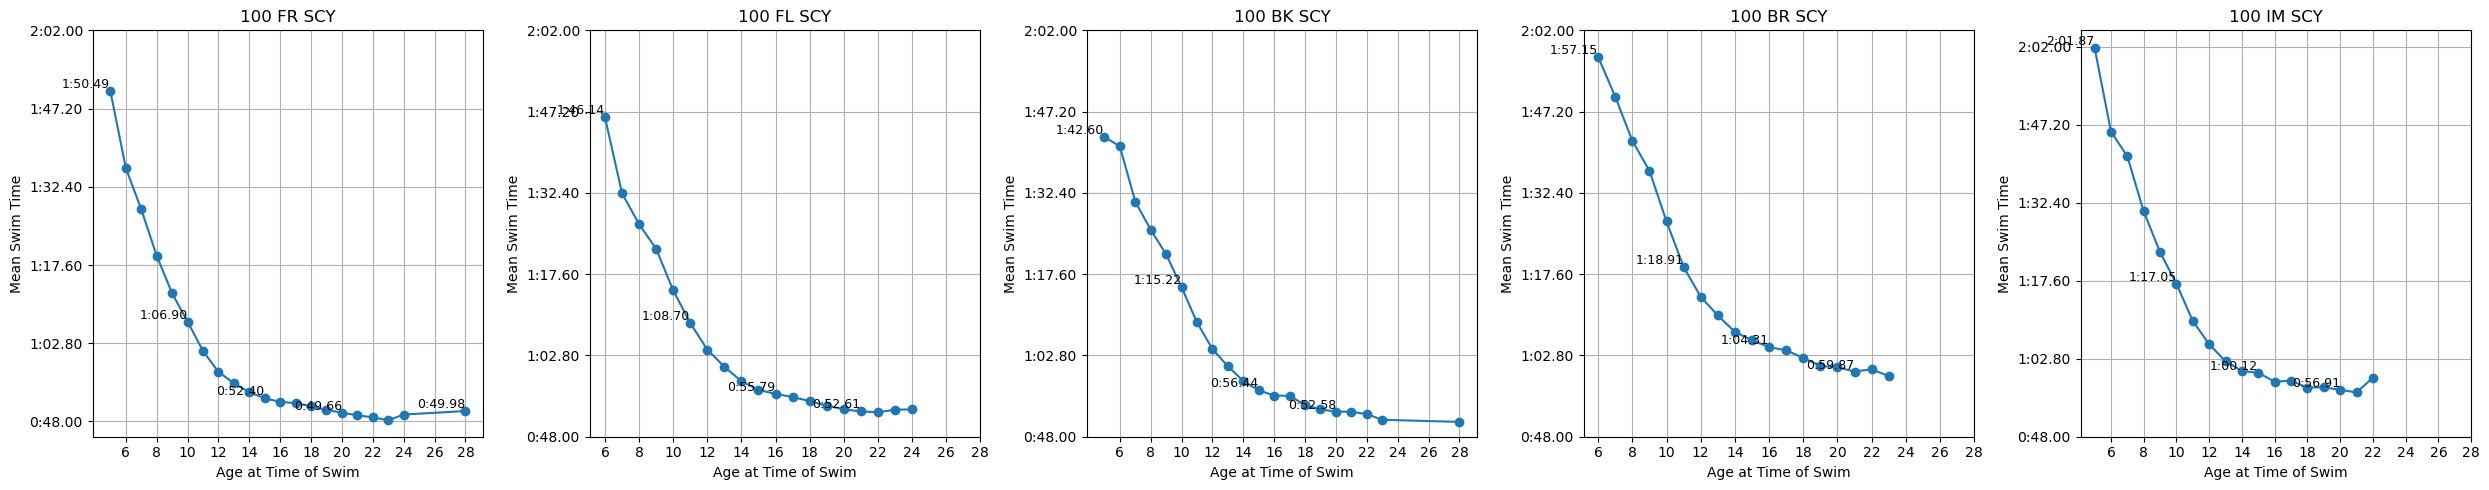

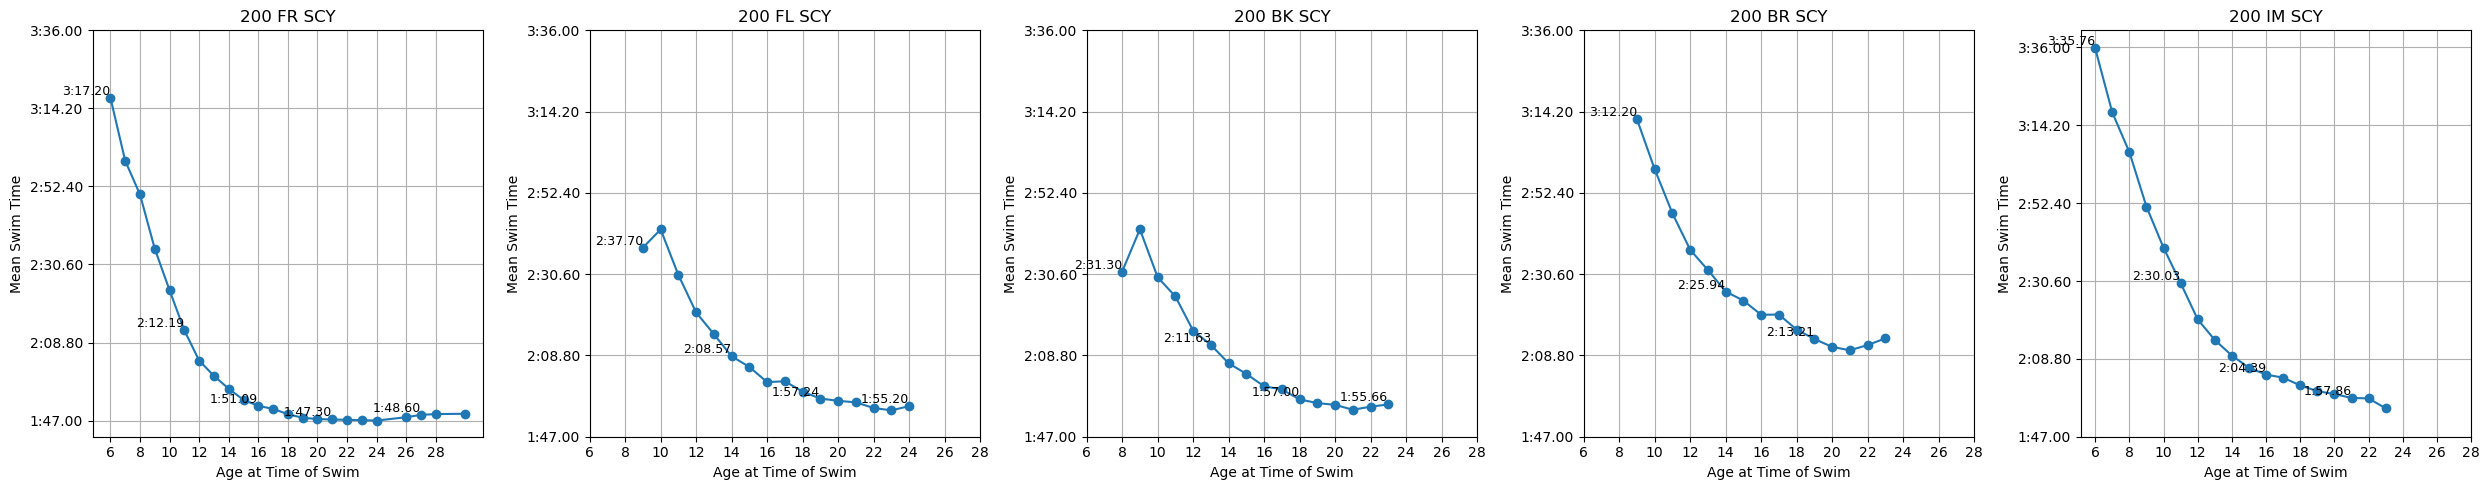

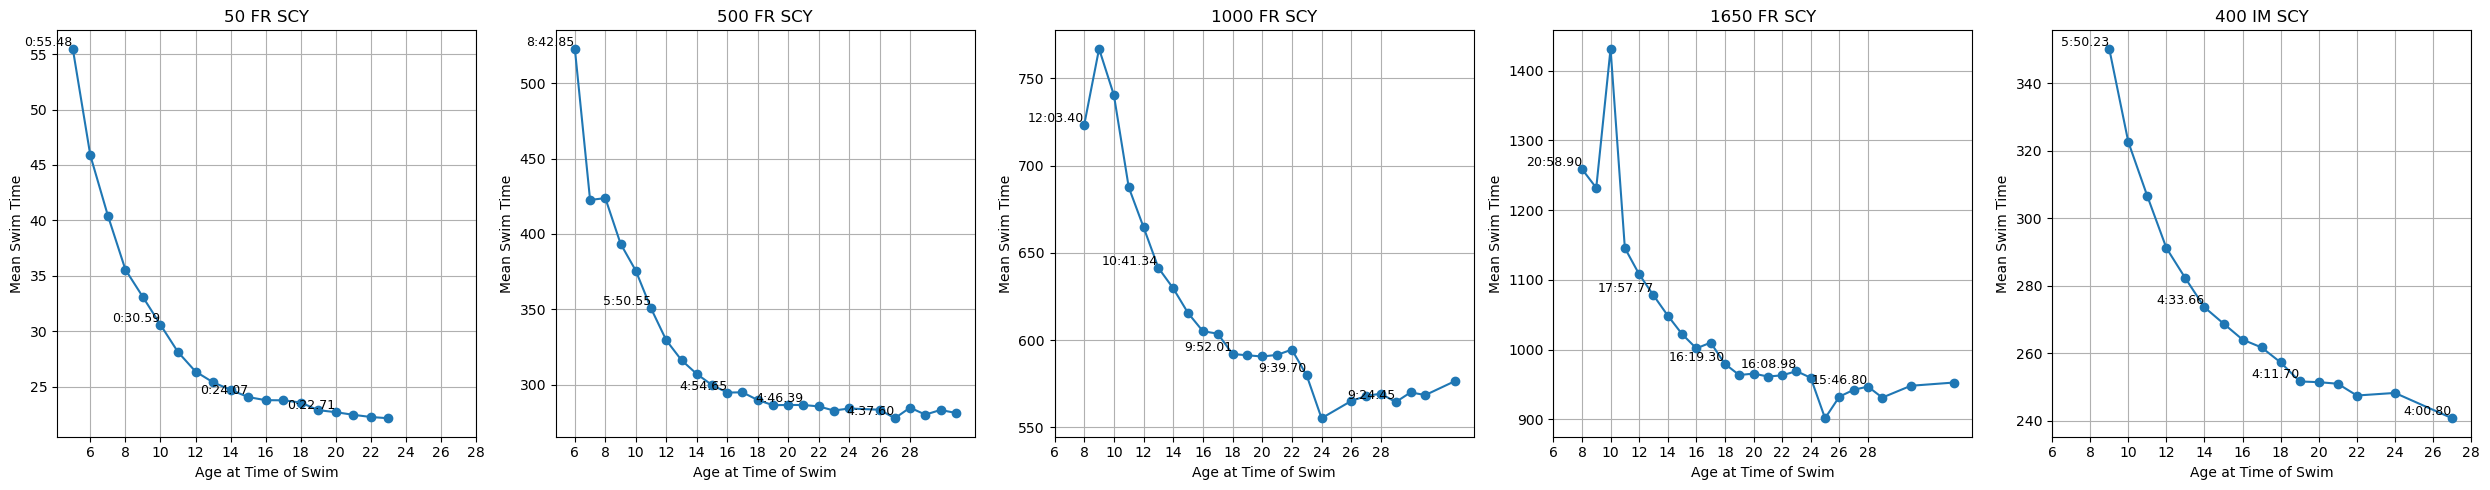

In [7]:
# Display the results
print(mean_swim_times[['Event', 'Age_at_time_of_Swim', 'Formatted_Time']])

# Plot a graph for each individual event
# Define age ticks for x-axis
age_ticks = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

# Define event groups for subplots
event_groups = {
    "100s": ["100 FR SCY", "100 FL SCY", "100 BK SCY", "100 BR SCY", "100 IM SCY"],
    "200s": ["200 FR SCY", "200 FL SCY", "200 BK SCY", "200 BR SCY", "200 IM SCY"],
    "Mixed": ["50 FR SCY", "500 FR SCY", "1000 FR SCY", "1650 FR SCY", "400 IM SCY"]
}


for group_name, events in event_groups.items():
    fig, axes = plt.subplots(1, len(events), figsize=(5 * len(events), 5))
    if len(events) == 1:
        axes = [axes]  # Ensure axes is iterable
    
    # Define shared y-axis range for each group, except Mixed
    if group_name != "Mixed":
        group_data = mean_swim_times[mean_swim_times['Event'].isin(events)]['Time']
        y_min, y_max = np.floor(group_data.min()), np.ceil(group_data.max())
        n_ticks = 6  # Ensure all graphs in the group have the same number of ticks
        common_y_ticks = np.linspace(y_min, y_max, n_ticks)
    
    for i, event in enumerate(events):
        if event in mean_swim_times['Event'].values:
            event_data = mean_swim_times[mean_swim_times['Event'] == event]
            axes[i].plot(event_data['Age_at_time_of_Swim'], event_data['Time'], marker='o', linestyle='-')
            axes[i].set_xlabel("Age at Time of Swim")
            axes[i].set_ylabel("Mean Swim Time")
            axes[i].set_title(f"{event}")
            axes[i].grid()
            
            # Set fixed age ticks for x-axis
            axes[i].set_xticks(age_ticks)
            
            # Set shared y-axis ticks for the group, except Mixed
            if group_name != "Mixed":
                axes[i].set_yticks(common_y_ticks)
                axes[i].set_yticklabels([format_time(t) for t in common_y_ticks])
            
            # Annotate every 5th data point with its formatted time
            for idx, (x, y, label) in enumerate(zip(event_data['Age_at_time_of_Swim'], event_data['Time'], event_data['Formatted_Time'])):
                if idx % 5 == 0:
                    axes[i].text(x, y, label, fontsize=9, verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()




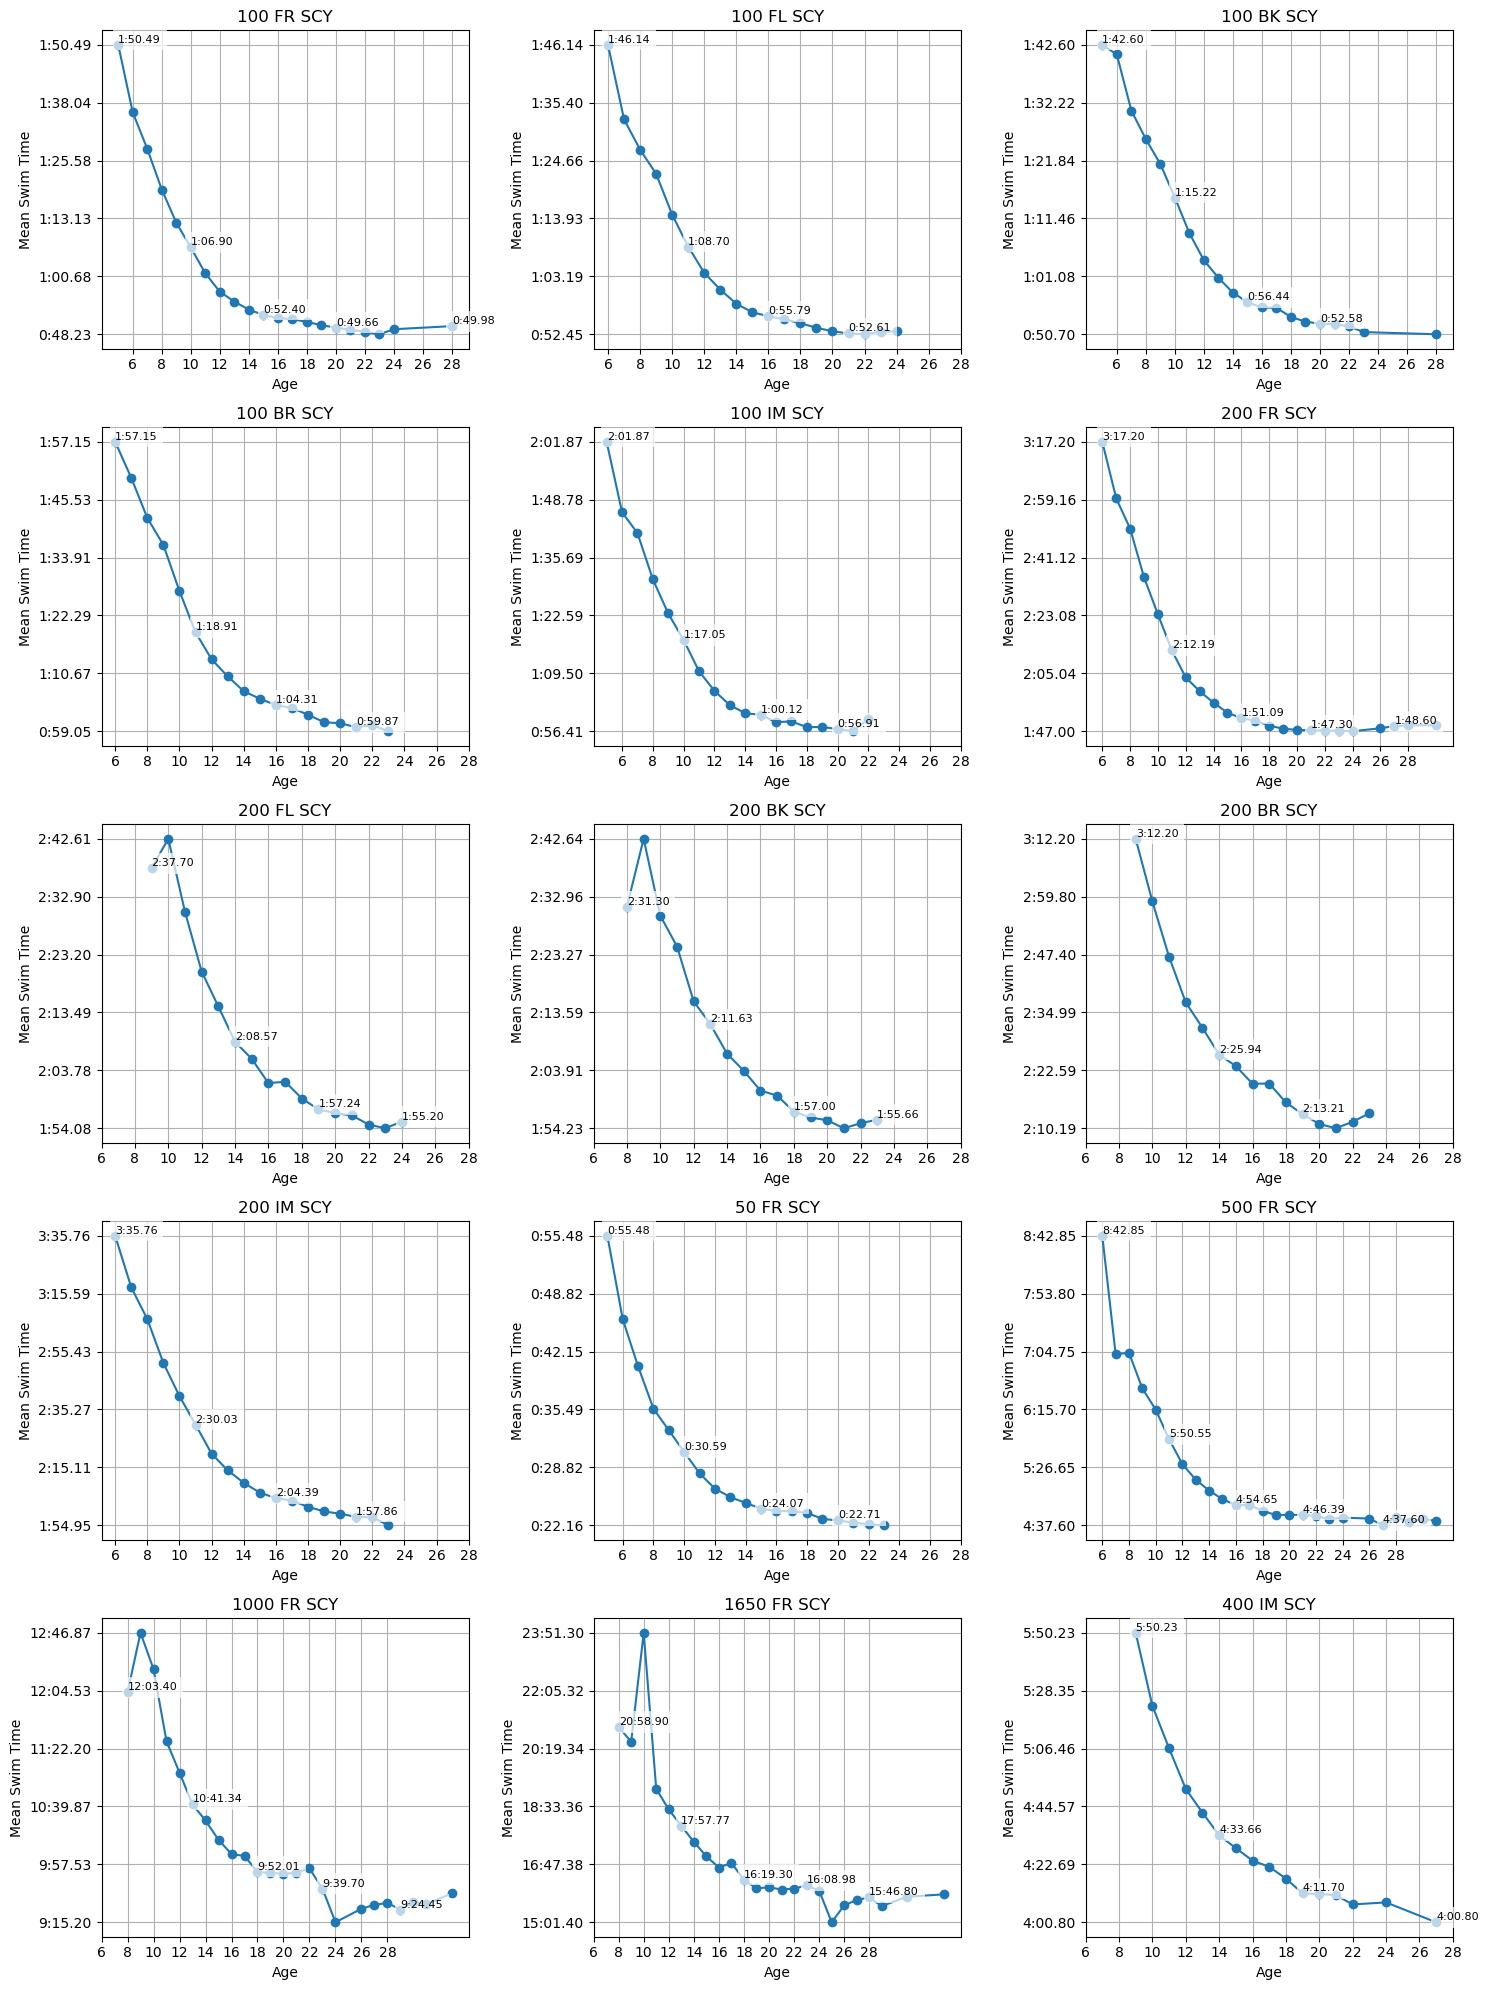

In [8]:
# Define events to be plotted
events_to_plot = [
    "100 FR SCY", "100 FL SCY", "100 BK SCY", "100 BR SCY", "100 IM SCY",
    "200 FR SCY", "200 FL SCY", "200 BK SCY", "200 BR SCY", "200 IM SCY",
    "50 FR SCY", "500 FR SCY", "1000 FR SCY", "1650 FR SCY", "400 IM SCY"
]

# Set up the figure with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # 15x20 ensures readability
axes = axes.flatten()  # Flatten the 2D axes array to easily iterate

# Define age ticks for x-axis
age_ticks = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

# Plot each event in the respective subplot
for i, event in enumerate(events_to_plot):
    if event in mean_swim_times['Event'].values:
        event_data = mean_swim_times[mean_swim_times['Event'] == event]
        
        # Plot data
        axes[i].plot(event_data['Age_at_time_of_Swim'], event_data['Time'], marker='o', linestyle='-')
        axes[i].set_xlabel("Age")
        axes[i].set_ylabel("Mean Swim Time")
        axes[i].set_title(event, fontsize=12)
        axes[i].grid()
        
        # Set fixed age ticks for x-axis
        axes[i].set_xticks(age_ticks)

        # Convert y-axis labels to MM:SS.ss format
        y_ticks = np.linspace(event_data['Time'].min(), event_data['Time'].max(), num=6)  # Create 6 evenly spaced ticks
        axes[i].set_yticks(y_ticks)  # Set y-ticks
        axes[i].set_yticklabels([format_time(tick) for tick in y_ticks])  # Format labels correctly

        # Annotate every 5th data point with its formatted time
        for idx, (x, y, label) in enumerate(zip(event_data['Age_at_time_of_Swim'], event_data['Time'], event_data['Formatted_Time'])):
            if idx % 5 == 0:
                axes[i].text(
                    x, y, label, 
                    fontsize=8, 
                    verticalalignment='bottom',  # Position below the point
                    horizontalalignment='left',  # Shift slightly to the right for better readability
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)  # Add a light background to enhance visibility
                )

# Remove any empty subplots if there are fewer than 15 events
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [9]:
# New Cell: Compute range between best and worst time per event at each age
time_ranges = df_cleaned.groupby(['Event', 'Age_at_time_of_Swim'])['Time'].agg(['min', 'max']).reset_index()

time_ranges['Formatted_Min'] = time_ranges['min'].apply(format_time)
time_ranges['Formatted_Max'] = time_ranges['max'].apply(format_time)

# Save results to a new CSV file
time_ranges.to_csv("time_ranges_by_age.csv", index=False)

# Define event list for 3-column, 5-row layout
events_to_plot = [
    "100 FR SCY", "100 FL SCY", "100 BK SCY", "100 BR SCY", "100 IM SCY",
    "200 FR SCY", "200 FL SCY", "200 BK SCY", "200 BR SCY", "200 IM SCY",
    "50 FR SCY", "500 FR SCY", "1000 FR SCY", "1650 FR SCY", "400 IM SCY"
]

# Display the results
print(time_ranges[['Event', 'Age_at_time_of_Swim', 'Formatted_Min', 'Formatted_Max']])


          Event  Age_at_time_of_Swim Formatted_Min Formatted_Max
0    100 BK SCY                    5       1:42.60       1:42.60
1    100 BK SCY                    6       1:25.90       2:12.40
2    100 BK SCY                    7       1:19.10       2:06.40
3    100 BK SCY                    8       1:08.20       1:54.00
4    100 BK SCY                    9       1:06.30       1:58.70
..          ...                  ...           ...           ...
287  500 FR SCY                   27       4:26.10       4:46.50
288  500 FR SCY                   28       4:39.80       4:53.10
289  500 FR SCY                   29       4:40.00       4:40.00
290  500 FR SCY                   30       4:43.10       4:43.10
291  500 FR SCY                   31       4:39.50       4:44.50

[292 rows x 4 columns]


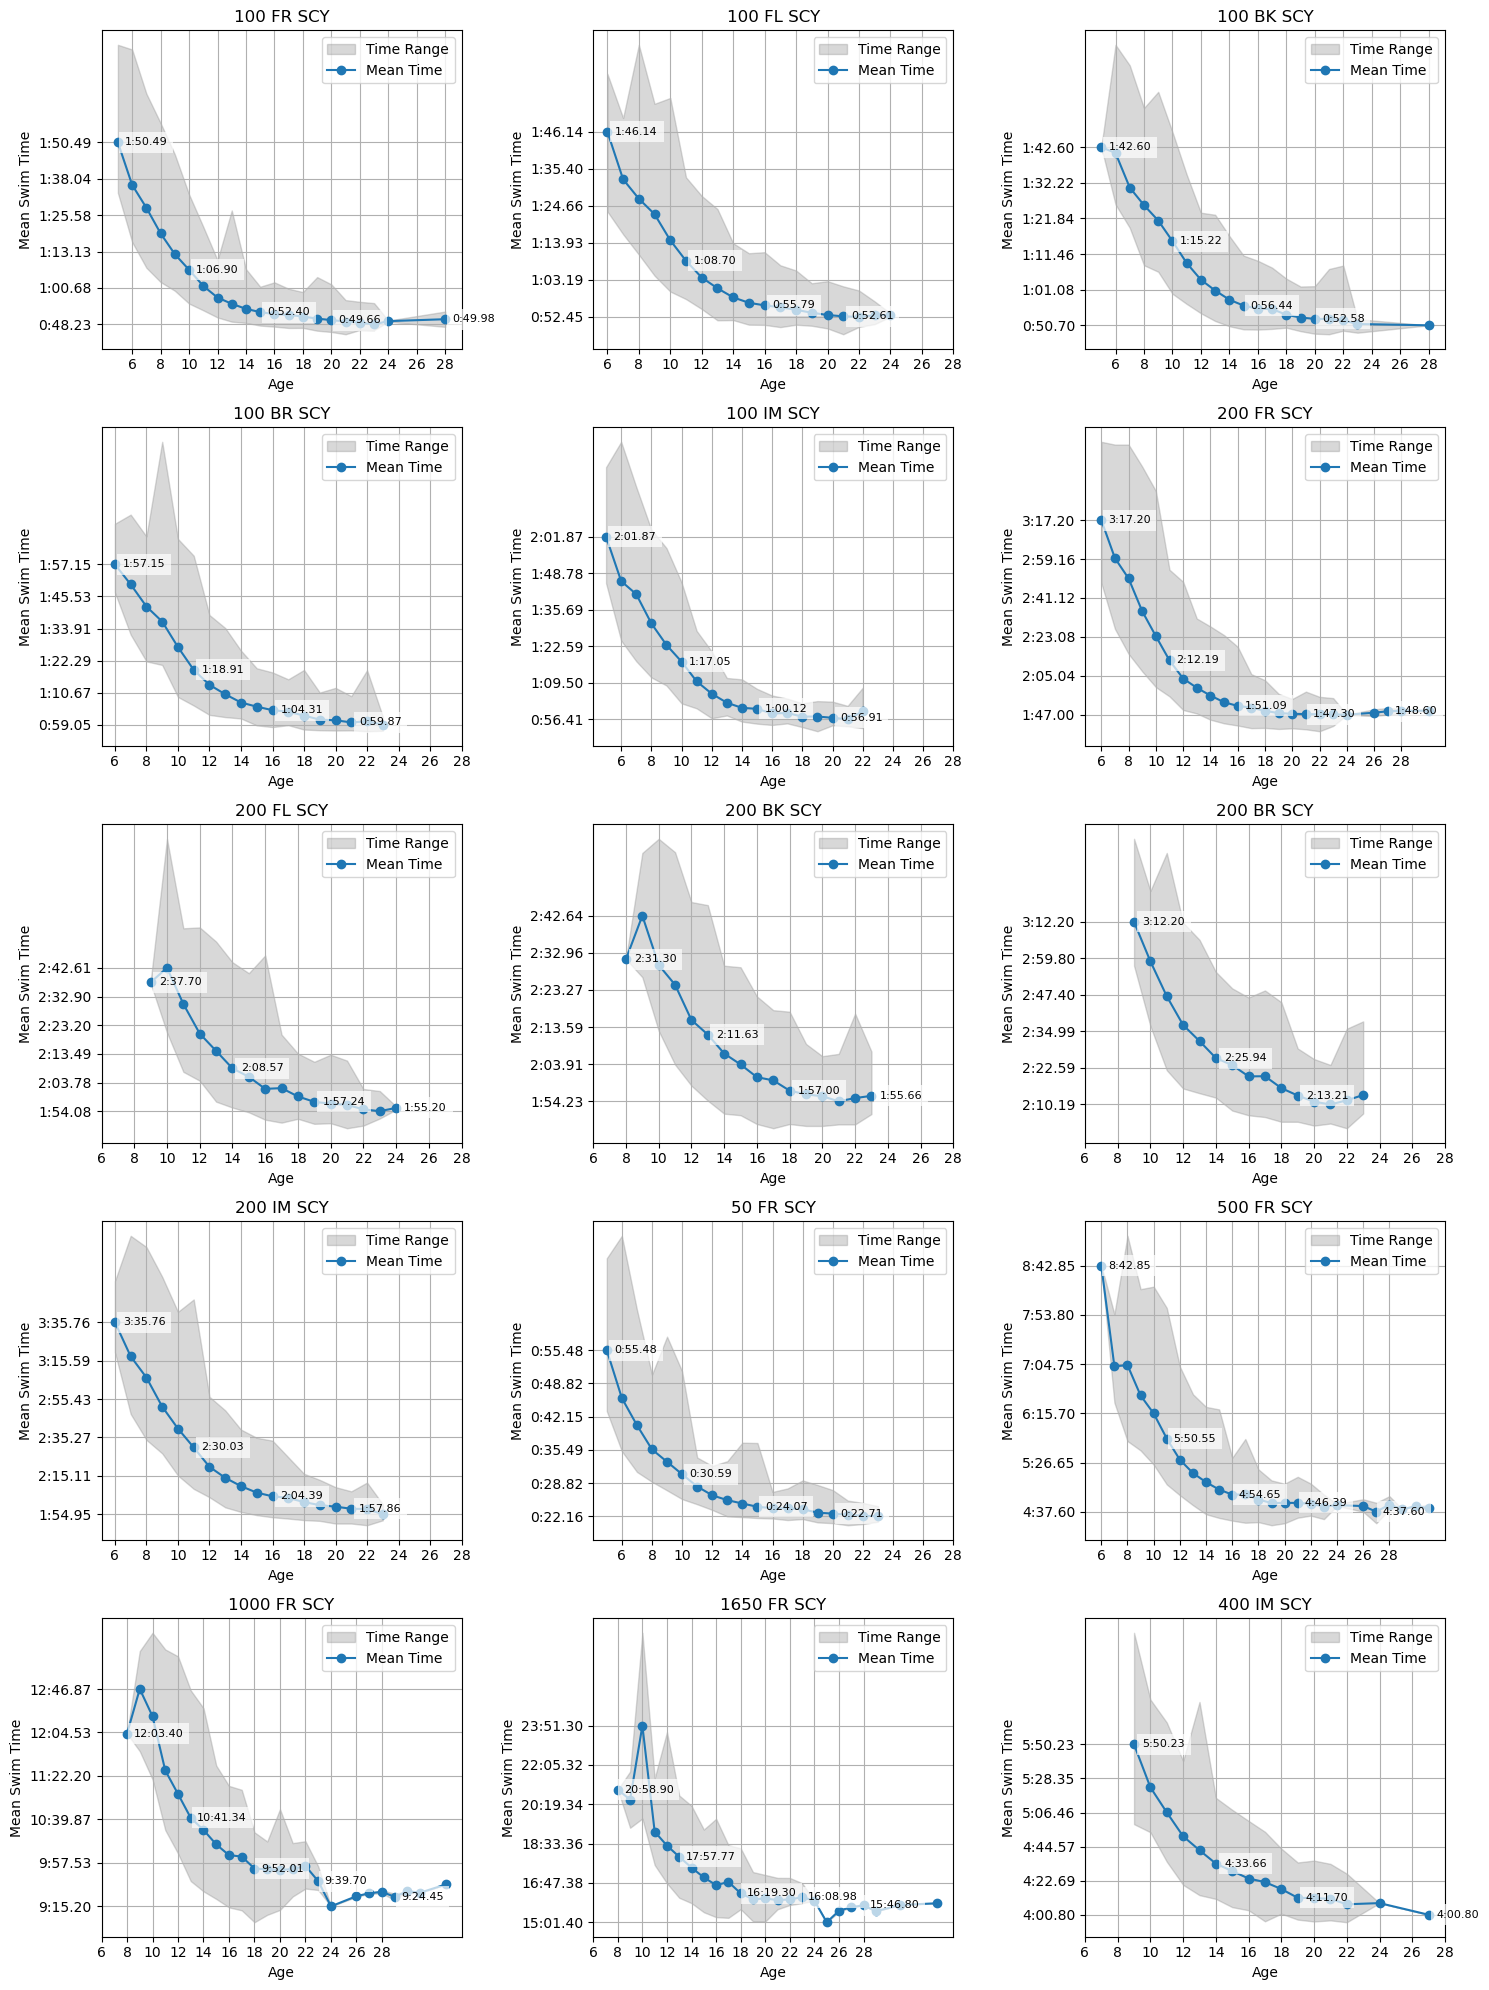

In [10]:
# Plot a graph for each individual event
# Define age ticks for x-axis
age_ticks = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

# Define event groups for subplots
event_groups = {
    "100s": ["100 FR SCY", "100 FL SCY", "100 BK SCY", "100 BR SCY", "100 IM SCY"],
    "200s": ["200 FR SCY", "200 FL SCY", "200 BK SCY", "200 BR SCY", "200 IM SCY"],
    "Mixed": ["50 FR SCY", "500 FR SCY", "1000 FR SCY", "1650 FR SCY", "400 IM SCY"]
}

# Set up the figure with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # 15x20 ensures readability
axes = axes.flatten()  # Flatten the 2D axes array to easily iterate

# Plot each event in the respective subplot
for i, event in enumerate(events_to_plot):
    if event in mean_swim_times['Event'].values:
        event_data = mean_swim_times[mean_swim_times['Event'] == event]
        range_data = time_ranges[time_ranges['Event'] == event]

        # Plot shaded region (Time Range)
        axes[i].fill_between(
            range_data['Age_at_time_of_Swim'], range_data['min'], range_data['max'],
            color='gray', alpha=0.3, label='Time Range'
        )

        # Plot mean swim times
        axes[i].plot(event_data['Age_at_time_of_Swim'], event_data['Time'], marker='o', linestyle='-', label='Mean Time')

        axes[i].set_xlabel("Age")
        axes[i].set_ylabel("Mean Swim Time")
        axes[i].set_title(event, fontsize=12)
        axes[i].grid()
        
        # Set fixed age ticks for x-axis
        axes[i].set_xticks(age_ticks)

        # Convert y-axis labels to MM:SS.ss format
        y_ticks = np.linspace(event_data['Time'].min(), event_data['Time'].max(), num=6)  # Create 6 evenly spaced ticks
        axes[i].set_yticks(y_ticks)  # Set y-ticks
        axes[i].set_yticklabels([format_time(tick) for tick in y_ticks])  # Format labels correctly

        # Annotate every 5th data point with its formatted time
        for idx, (x, y, label) in enumerate(zip(event_data['Age_at_time_of_Swim'], event_data['Time'], event_data['Formatted_Time'])):
            if idx % 5 == 0:
                axes[i].text(
                    x + 0.5, y, label,  # Shift x slightly for better readability
                    fontsize=8, 
                    verticalalignment='center',  # Center-align vertically
                    horizontalalignment='left',  # Move text slightly to the right
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)  # Light background to enhance visibility
                )

        axes[i].legend()

# Remove any empty subplots if there are fewer than 15 events
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

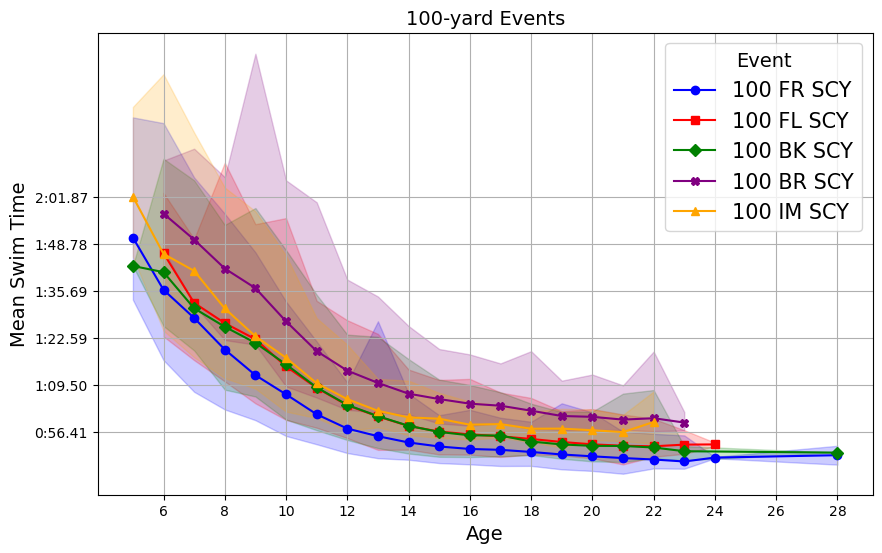

Saved: 100-yard_events.pdf


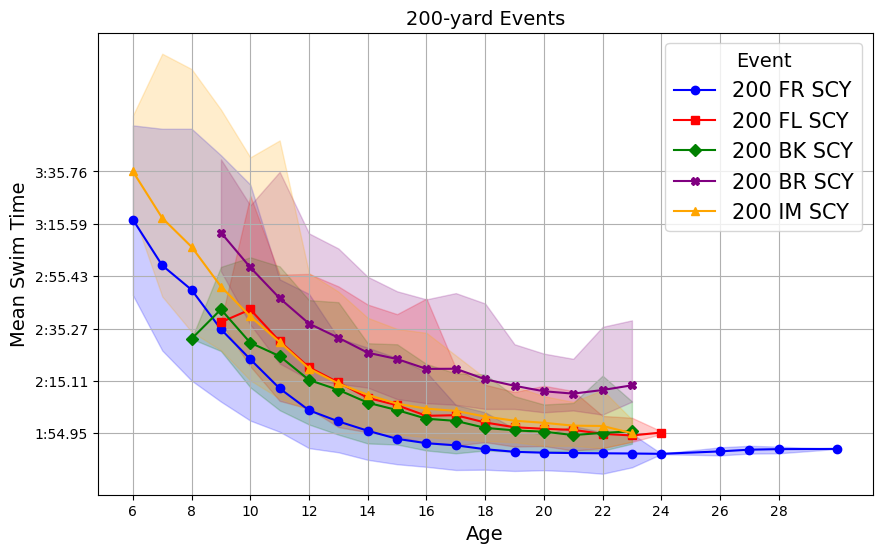

Saved: 200-yard_events.pdf


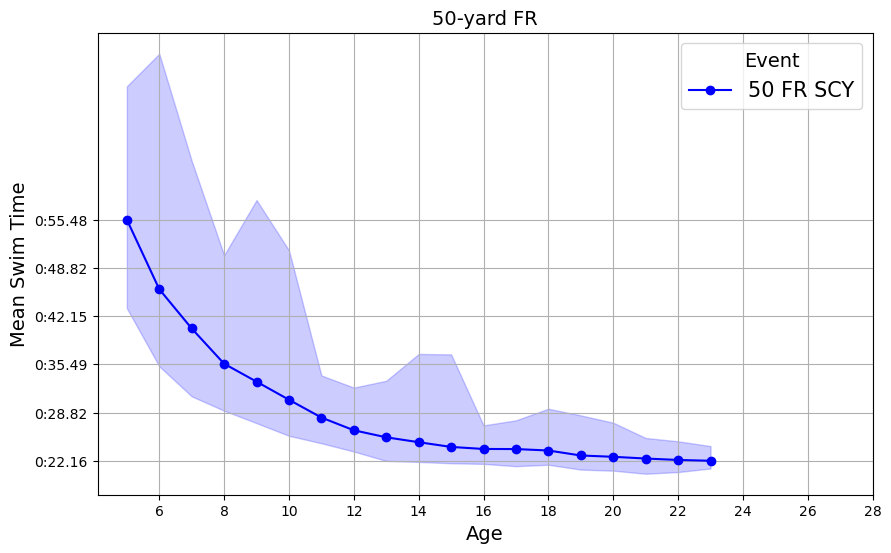

Saved: 50-yard_fr.pdf


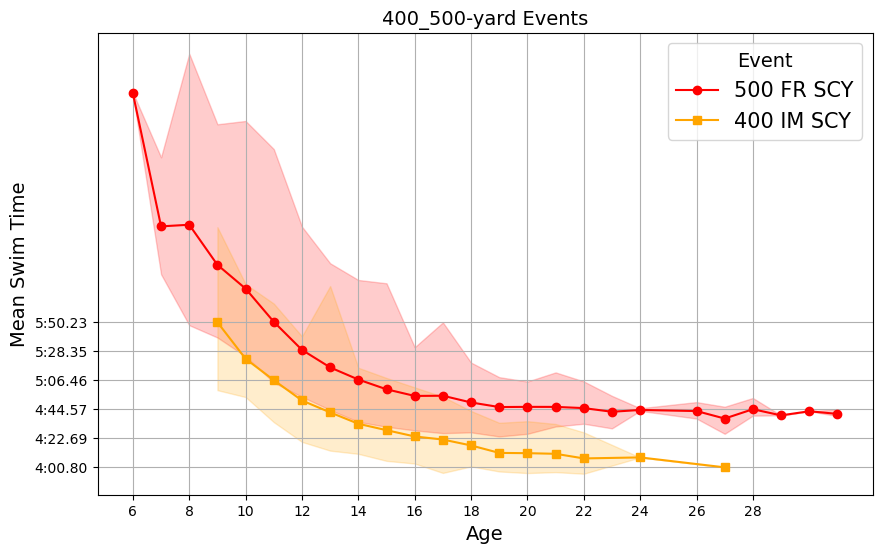

Saved: 400_500-yard_events.pdf


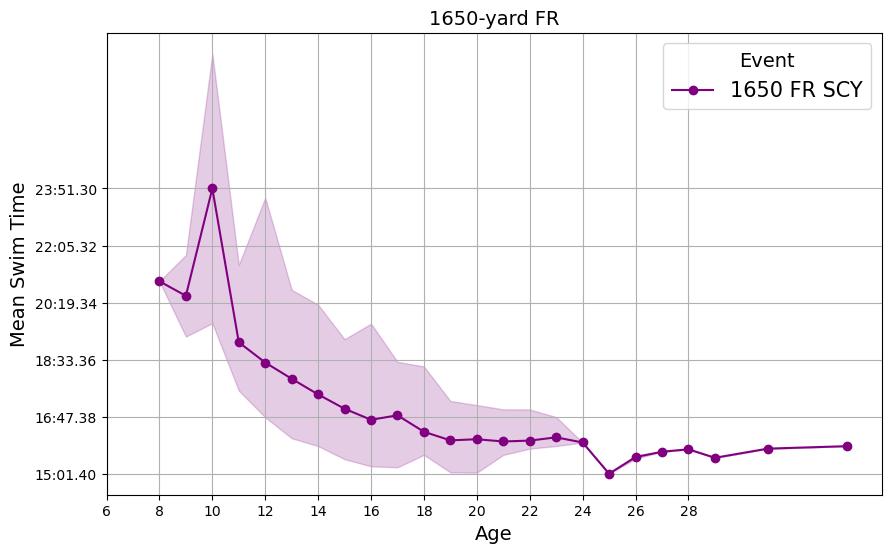

Saved: 1650-yard_fr.pdf


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define event groups
event_groups = {
    "100-yard Events": ["100 FR SCY", "100 FL SCY", "100 BK SCY", "100 BR SCY", "100 IM SCY"],
    "200-yard Events": ["200 FR SCY", "200 FL SCY", "200 BK SCY", "200 BR SCY", "200 IM SCY"],
    "50-yard FR": ["50 FR SCY"],
    "400_500-yard Events": ["500 FR SCY", "400 IM SCY"], 
    "1650-yard FR": ["1650 FR SCY"]
}

# Define colors for different strokes
colors = {
    "100 FR SCY": "blue", "100 FL SCY": "red", "100 BK SCY": "green", "100 BR SCY": "purple", "100 IM SCY": "orange",
    "200 FR SCY": "blue", "200 FL SCY": "red", "200 BK SCY": "green", "200 BR SCY": "purple", "200 IM SCY": "orange",
    "50 FR SCY": "blue", "500 FR SCY": "red", "1000 FR SCY": "green", "1650 FR SCY": "purple", "400 IM SCY": "orange"
}

# Define markers for differentiation
markers = ["o", "s", "D", "X", "^"]

# Set age ticks for x-axis
age_ticks = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

# Plot each group in a separate figure
for group_name, events in event_groups.items():
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, event in enumerate(events):
        if event in mean_swim_times['Event'].values:
            event_data = mean_swim_times[mean_swim_times['Event'] == event]
            range_data = time_ranges[time_ranges['Event'] == event]

            # Plot shaded region for time range
            ax.fill_between(
                range_data['Age_at_time_of_Swim'], range_data['min'], range_data['max'],
                color=colors[event], alpha=0.2
            )

            # Plot mean swim times
            ax.plot(
                event_data['Age_at_time_of_Swim'], event_data['Time'],
                marker=markers[i % len(markers)], linestyle="-",
                color=colors[event], label=event
            )

    # Labels and titles
    ax.set_xlabel("Age", fontsize=14)
    ax.set_ylabel("Mean Swim Time", fontsize=14)
    ax.set_title(f"{group_name}", fontsize=14)
    ax.grid()

    # Set fixed age ticks
    ax.set_xticks(age_ticks)

    # Format y-axis times to MM:SS.ss
    y_ticks = np.linspace(event_data["Time"].min(), event_data["Time"].max(), num=6)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([format_time(tick) for tick in y_ticks])

    # Add legend
    ax.legend(fontsize=15, loc="upper right", title="Event", title_fontsize=14)

    # Save plot as high-quality PDF for LaTeX
    pdf_filename = f"{group_name.replace(' ', '_').lower()}.pdf"
    plt.savefig(pdf_filename, format="pdf", dpi=300, bbox_inches="tight")

    plt.show()

    print(f"Saved: {pdf_filename}")


In [12]:
# Function to format specialties into the same format as Event
def format_specialty(specialty):
    """Convert Specialty format to match Event format (e.g., '200 Free' -> '200 FR')."""
    stroke_mapping = {
        "Free": "FR",
        "Back": "BK",
        "Breast": "BR",
        "Fly": "FL",
        "IM": "IM"
    }
    if pd.isna(specialty):  # Handle NaNs
        return None

    parts = specialty.split()
    if len(parts) < 2:
        return specialty  # Return as-is if improperly formatted

    distance = parts[0]  # Example: "200"
    stroke = parts[1]  # Example: "Free"

    # Convert stroke name to correct format
    return f"{distance} {stroke_mapping.get(stroke, stroke)}"

# Standardize Event, Specialty_1, and Specialty_2 formatting
df_cleaned["Event"] = df_cleaned["Event"].str.replace(" SCY", "", regex=False)  # Remove SCY suffix
df_cleaned["Specialty_1"] = df_cleaned["Specialty_1"].apply(format_specialty)
df_cleaned["Specialty_2"] = df_cleaned["Specialty_2"].apply(format_specialty)


# Identify specialists
specialist_data = df_cleaned[
    (df_cleaned["Event"] == df_cleaned["Specialty_1"]) | (df_cleaned["Event"] == df_cleaned["Specialty_2"])
]

# Identify non-specialists
non_specialist_data = df_cleaned[
    ~((df_cleaned["Event"] == df_cleaned["Specialty_1"]) | (df_cleaned["Event"] == df_cleaned["Specialty_2"]))
]

# Display head to verify
print("Specialist Data Sample:\n", specialist_data.head())
print("Non-Specialist Data Sample:\n", non_specialist_data.head())


Specialist Data Sample:
            Name   Event   Time  Age_at_time_of_Swim  \
423  Alex Walsh  200 BR  122.1                   22   
424  Alex Walsh  200 BR  122.2                   22   
425  Alex Walsh  200 BR  123.0                   20   
426  Alex Walsh  200 BR  123.7                   21   
427  Alex Walsh  200 BR  123.9                   21   

                        Time_cut  Time_cut_points   Swim_date Specialty_1  \
423  2024 Summer Nationals (LCM)               19  2024-03-23      200 IM   
424  2024 Summer Nationals (LCM)               19  2024-02-24      200 IM   
425  2023 Summer Nationals (LCM)               19  2022-02-19      200 IM   
426  2023 Summer Nationals (LCM)               19  2023-02-18      200 IM   
427  2023 Summer Nationals (LCM)               19  2022-11-19      200 IM   

    Specialty_2 Stroke_1 Stroke_2 Stroke_3  
423      200 BR       IM   Breast     Back  
424      200 BR       IM   Breast     Back  
425      200 BR       IM   Breast     Back  
4

In [13]:
# Compute mean swim time per event and age for specialists
specialist_means = specialist_data.groupby(["Event", "Age_at_time_of_Swim"])["Time"].mean().reset_index()

# Compute mean swim time per event and age for non-specialists
non_specialist_means = non_specialist_data.groupby(["Event", "Age_at_time_of_Swim"])["Time"].mean().reset_index()

# Convert mean times to MM:SS.ss format
def format_time(seconds):
    """Convert time from seconds to MM:SS.ss format."""
    minutes = int(seconds // 60)
    sec = seconds % 60
    return f"{minutes}:{sec:05.2f}"

specialist_means["Formatted_Time"] = specialist_means["Time"].apply(format_time)
non_specialist_means["Formatted_Time"] = non_specialist_means["Time"].apply(format_time)

# Display results
print("\nSpecialist Mean Swim Times:\n", specialist_means.head())
print("\nNon-Specialist Mean Swim Times:\n", non_specialist_means.head())

# Save to CSV for reference
specialist_means.to_csv("specialist_mean_times.csv", index=False)
non_specialist_means.to_csv("non_specialist_mean_times.csv", index=False)



Specialist Mean Swim Times:
     Event  Age_at_time_of_Swim        Time Formatted_Time
0  100 BK                    6  102.240000        1:42.24
1  100 BK                    7   92.312500        1:32.31
2  100 BK                    8   80.552632        1:20.55
3  100 BK                    9   79.839394        1:19.84
4  100 BK                   10   75.102990        1:15.10

Non-Specialist Mean Swim Times:
     Event  Age_at_time_of_Swim        Time Formatted_Time
0  100 BK                    5  102.600000        1:42.60
1  100 BK                    6   99.500000        1:39.50
2  100 BK                    7   90.210000        1:30.21
3  100 BK                    8   86.981579        1:26.98
4  100 BK                    9   81.577837        1:21.58
